In [ ]:
# better mode of publicity for the sales of a product in the company
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


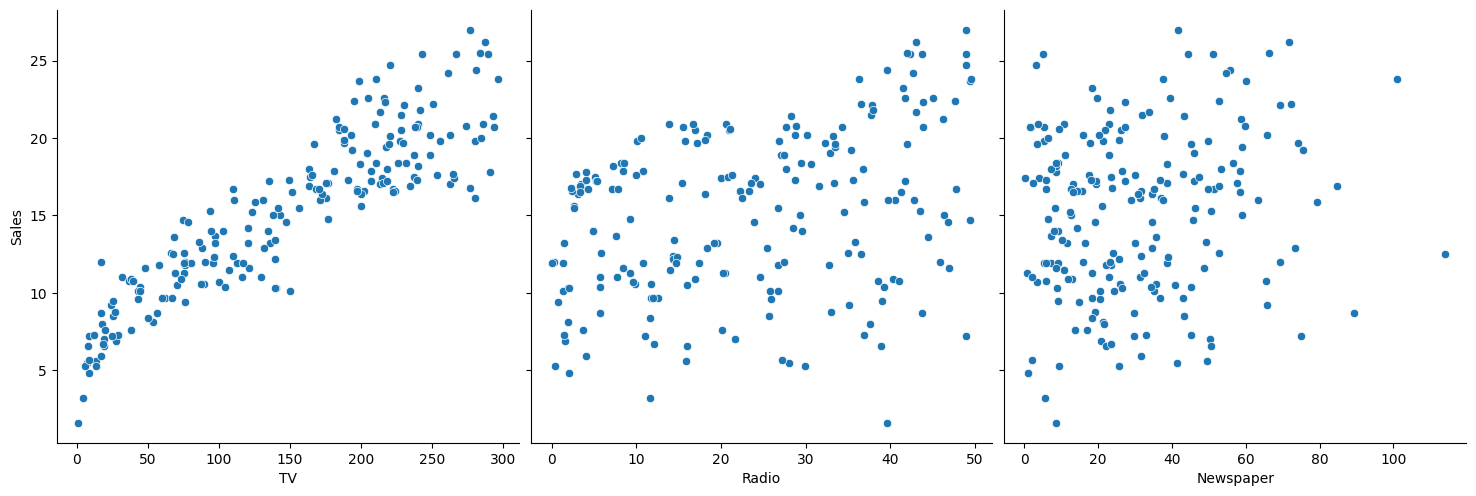

In [ ]:
sns.pairplot(df, x_vars = ["TV",'Radio','Newspaper'], y_vars = 'Sales', size = 5, aspect = 1, kind = 'scatter')
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

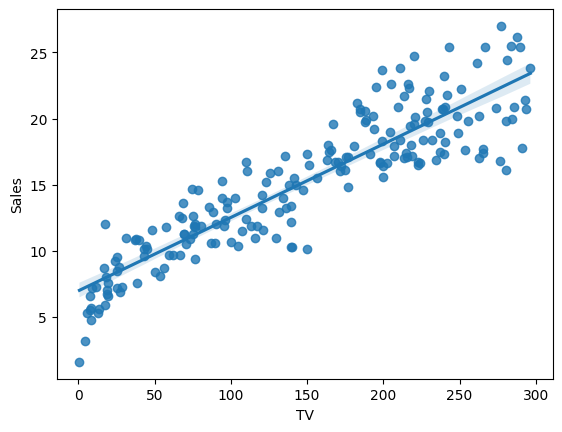

In [ ]:
sns.regplot(x = 'TV', y= 'Sales', data =df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

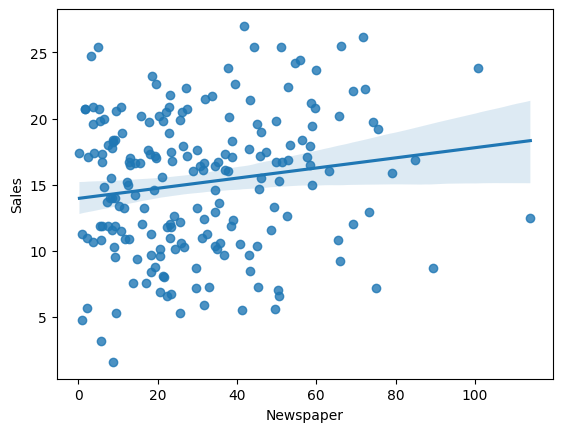

In [ ]:
sns.regplot(x = 'Newspaper', y='Sales', data = df)

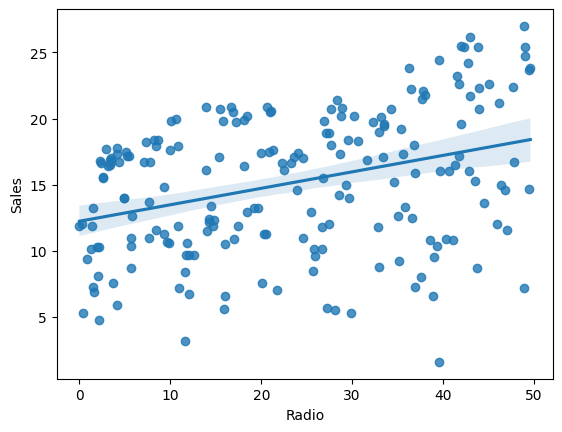

In [ ]:
sns.regplot(x = "Radio", y = 'Sales', data =df)
plt.show()

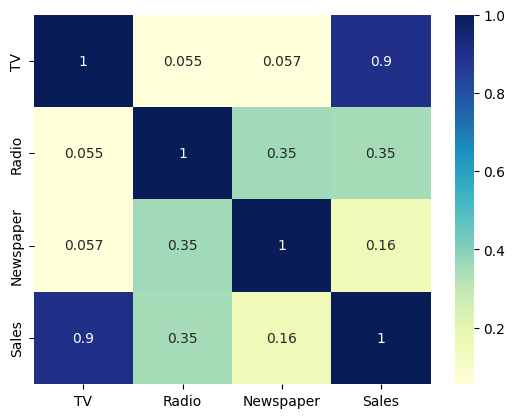

In [ ]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

In [ ]:
X = df['TV']
y = df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [ ]:
X_train.shape

(140,)

In [ ]:
X_test.shape

(60,)

In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [ ]:
y_train.shape

(140,)

In [ ]:
#building the model for training dataset
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.params)
print(lr.summary())

const    6.948683
TV       0.054546
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.52e-52
Time:                        09:47:09   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

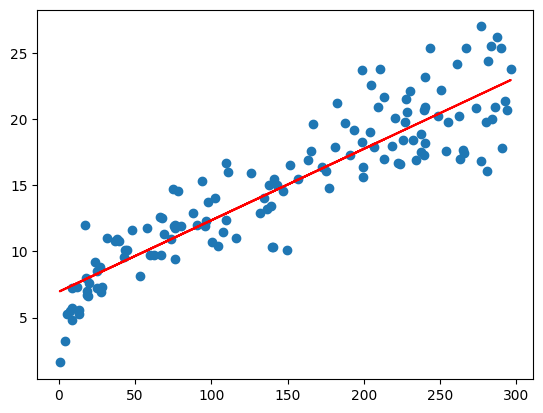

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 6.948 + 0.054 *X_train,'r')
plt.show()

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)
print(y_train, y_train_pred)

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64 74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64


<ipython-input-24-1877561724c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins = 15)


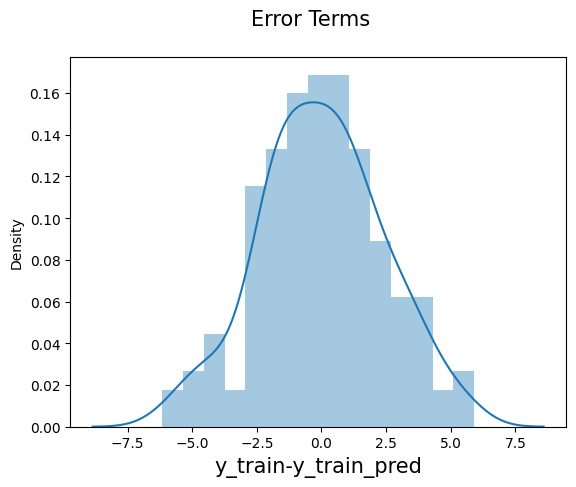

In [ ]:
fig = plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train-y_train_pred', fontsize = 15)
plt.show()

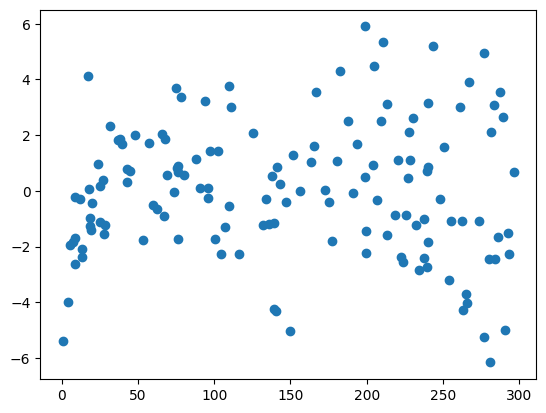

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
y_test_pred.head()


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('mean squared error', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('r score:', r2_score(y_test,y_test_pred))
print('mean absolute error:', mean_absolute_error(y_test,y_test_pred))

mean squared error 2.019296008966232
r score: 0.792103160124566
mean absolute error: 1.648058986974653


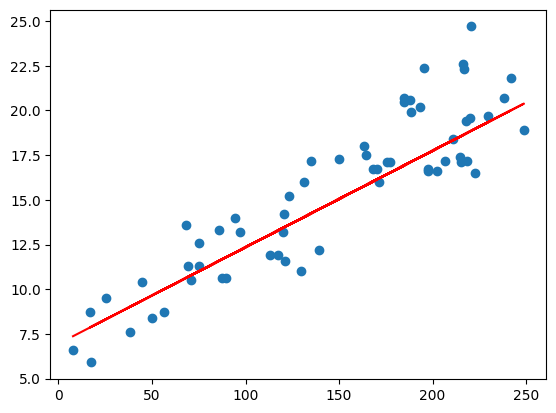

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test, 6.948+0.054*X_test,'r')
plt.show()

In [ ]:
X = df['Radio']
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.params)
print(lr.summary())


const    12.164674
Radio     0.123920
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           5.36e-05
Time:                        10:04:31   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

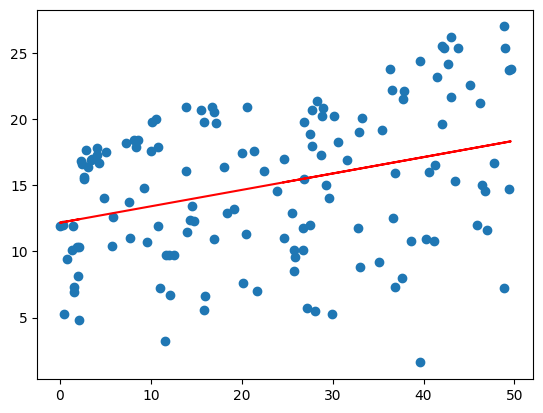

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64 74     15.213103
3      17.282565
185    17.753460
26     15.795526
90     12.771882
         ...    
87     17.195821
103    14.296096
67     13.961512
24     13.726065
8      12.424906
Length: 140, dtype: float64


<ipython-input-32-5b0f8090c862>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins = 15)


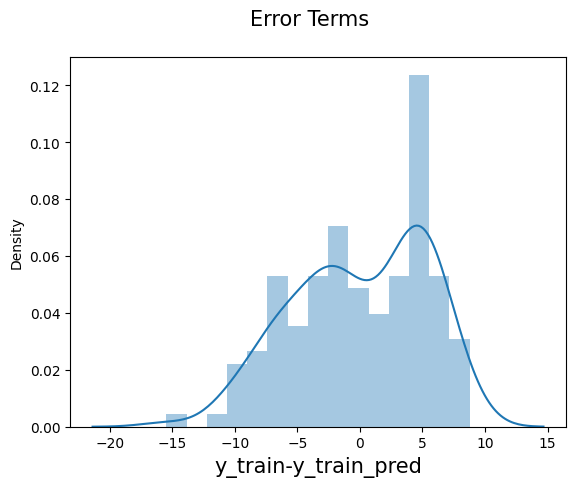

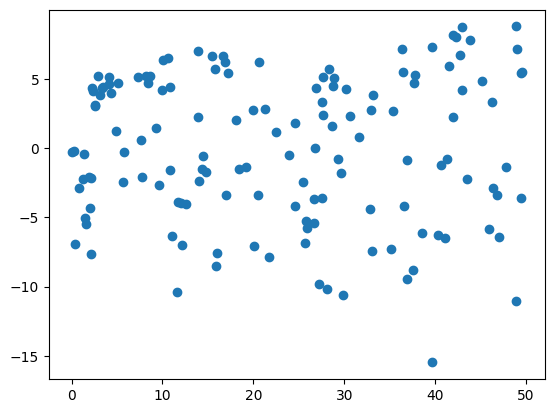

mean squared error 4.07311786277614
r score: 0.1541334154583961
mean absolute error: 3.518487747948533


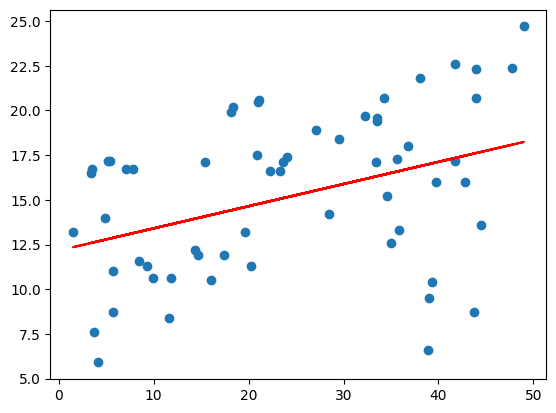

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 12.165 + 0.124 *X_train,'r')
plt.show()
y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)
print(y_train, y_train_pred)
fig = plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train-y_train_pred', fontsize = 15)
plt.show()
plt.scatter(X_train,res)
plt.show()
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
print('mean squared error', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('r score:', r2_score(y_test,y_test_pred))
print('mean absolute error:', mean_absolute_error(y_test,y_test_pred))
plt.scatter(X_test,y_test)
plt.plot(X_test, 12.165 + 0.124 *X_test,'r')
plt.show()

In [ ]:
X = df['Newspaper']
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.params)
print(lr.summary())

const        13.132714
Newspaper     0.059574
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     8.461
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00423
Time:                        10:09:22   Log-Likelihood:                -435.38
No. Observations:                 140   AIC:                             874.8
Df Residuals:                     138   BIC:                             880.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

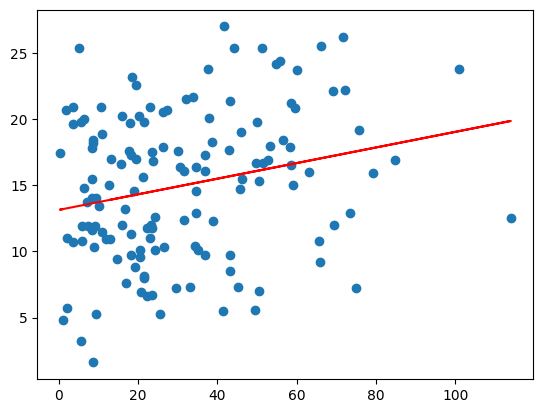

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64 74     13.913131
3      16.617781
185    14.300361
26     13.883344
90     13.686750
         ...    
87     16.897778
103    14.199085
67     13.740367
24     14.222915
8      13.192288
Length: 140, dtype: float64


<ipython-input-34-306f1a247af3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins = 15)


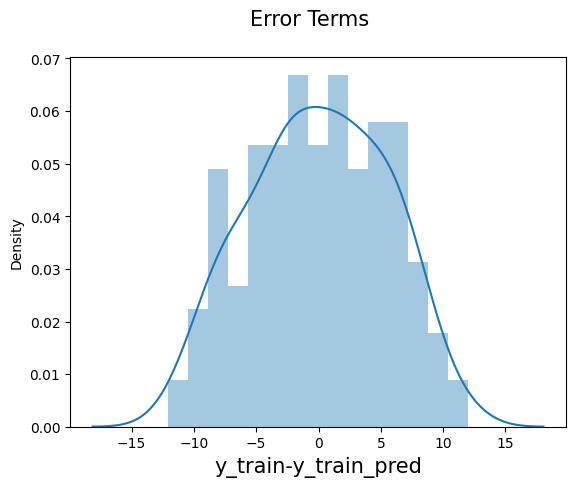

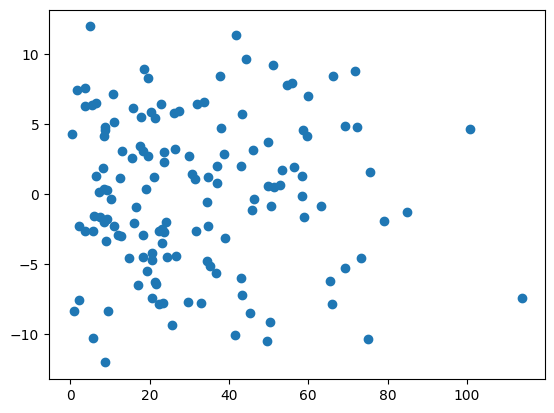

mean squared error 4.7380311480279085
r score: -0.14457363289935943
mean absolute error: 4.001283892536272


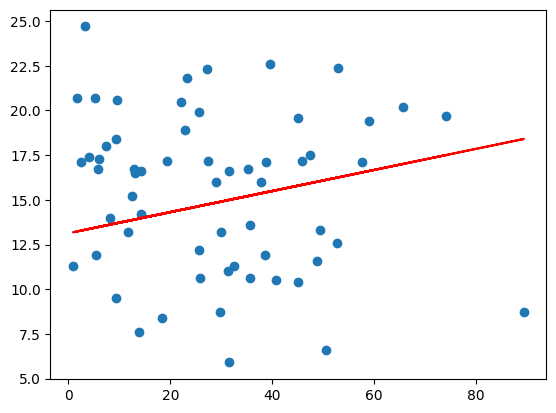

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 13.133 + 0.059 *X_train,'r')
plt.show()
y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)
print(y_train, y_train_pred)
fig = plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train-y_train_pred', fontsize = 15)
plt.show()
plt.scatter(X_train,res)
plt.show()
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
print('mean squared error', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('r score:', r2_score(y_test,y_test_pred))
print('mean absolute error:', mean_absolute_error(y_test,y_test_pred))
plt.scatter(X_test,y_test)
plt.plot(X_test, 13.133 + 0.059 *X_test,'r')
plt.show()